### 1. Introduction: Google Play Store apps and reviews
- do a comprehensive analysis of the Android app market 
- compare over ten thousand apps in Google Play across different categories
- look for insights in the data to devise strategies to drive growth and retention

Two files:

- apps.csv: contains 13 features that describe a given app.
- user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


###  1.1 Load data
1. `file_path = os.path.join(current_dir, 'datasets', 'apps.csv')`
1. `with open(file_path, mode ='r',encoding="utf-8") as my_file:
    apps_with_duplicates = pd.read_csv(my_file, index_col = None)`

In [78]:
# Read in dataset
import pandas as pd
import os as os
current_dir = os.getcwd()
print(current_dir)

# join directory, sub-directory, and file name 
file_path = os.path.join(current_dir, 'datasets', 'apps.csv')
print(file_path)
print(type(file_path))

# Read in the CSV as a DataFrame
with open(file_path, mode ='r',encoding="utf-8") as my_file: # https://github.com/mwouts/jupytext/issues/770
    print(type(my_file))
    apps_with_duplicates = pd.read_csv(my_file, index_col = None)
    
apps_with_duplicates.info()
apps_with_duplicates.head(5)

D:\datacamp\Project\P2 The Android App Market on Google Play
D:\datacamp\Project\P2 The Android App Market on Google Play\datasets\apps.csv
<class 'str'>
<class '_io.TextIOWrapper'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null  

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1.2 dorp all duplicate rows
- df.drop_duplicates rows
- check the number of total apps before and after df.drop_duplicates()
- random check of 5 sample rows: df.sample(5)

1. ` df.drop_duplicates() `
1. ` print('Total number of apps in the dataset = ', len(df))`

In [20]:
# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset before drop_duplicates = ', len(apps_with_duplicates))
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n=5)

Total number of apps in the dataset before drop_duplicates =  9659
Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3333,4204,MJX H,FAMILY,3.7,126,13.0,"10,000+",Free,0,Everyone,Entertainment,"August 22, 2017",1.0-build20170819,4.1 and up
8567,9709,The Visitor: Ep.2 - Sleepover Slaughter,GAME,4.3,5731,31.0,"1,000,000+",Free,0,Mature 17+,Adventure,"January 2, 2018",1.1.5,4.1 and up
8914,10074,Virtual Dice EX,GAME,4.3,40,3.6,"5,000+",Free,0,Everyone,Board,"March 15, 2016",2.8,3.0 and up
768,952,LEGO® TV,ENTERTAINMENT,3.7,17247,7.2,"1,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"August 4, 2018",4.0.2,5.0 and up
83,83,Speed Camera Detector - Traffic & Speed Alert,AUTO_AND_VEHICLES,4.3,138,5.4,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 23, 2018",1,4.0.3 and up


### 2. Data cleaning

By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like Installs and Price have a few special characters (+ , $</code>) due to the way the numbers have been represented. 
Ideally, we would want these columns to contain only digits from [0-9].

Hence, we now proceed to clean our data. 
- the special characters `,` and `+` present in `Installs` column
- the `$` present in `Price` column need to be removed.
- We will use the info() method to print a summary of your dataframe after completing data cleaning.

- `1apps[col] = apps[col].str.replace(chars, '')`
- `apps[cols_to_clean].sample(n=5)`

In [22]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']
apps[cols_to_clean].info()

apps[cols_to_clean] = apps[cols_to_clean].astype('category')

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # assert column type is category to run str.replace method
    assert apps[col].dtypes =='category'
    
    # Loop for each char in chars_to_remove
    for chars in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].str.replace(chars, '')
    
# Have a look at a random sample of 5 rows at the two columns
apps[cols_to_clean].sample(n=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Installs  9659 non-null   object
 1   Price     9659 non-null   object
dtypes: object(2)
memory usage: 226.4+ KB


,Installs,Price
9421,50000,0
3201,50000,0
4070,100000,0
6529,100000,2.99
696,10000000,0


# 3. Correcting data types

- `Installs` and `Price` were categorized as object data type (and not int or float) as we would like.  
- Because these two columns originally had mixed input types: digits and special characters. 


The four features to be used are `Installs`, `Size`, `Rating` and `Price`. 
- `Size` and `Rating` are both float (i.e. purely numerical data types), 
-  need to work on `Installs` and `Price` to make them numeric.

1. `apps['Price'] = apps['Price'].astype(float)`

In [23]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)

# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


### 4. Exploring app categories

Google has introduced the concept of grouping apps into categories.This brings us to the following questions:

    Which category has the highest share of (active) apps in the market?
    Is any specific category dominating the market?
    Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. 
- Family and Game apps have the highest market prevalence. 
- Tools, Business and Medical apps are also at the top.


1. `num_categories = len(apps['Category'].unique())`
1. `num_apps_in_category = apps['Category'].value_counts()`
1. `num_apps_in_category.sort_values(ascending=False)`

Number of categories =  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


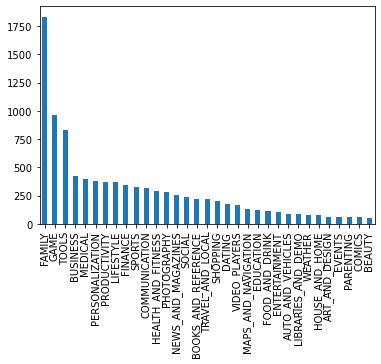

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()
print(num_apps_in_category)

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)
sorted_num_apps_in_category.head()

# plot the results
sorted_num_apps_in_category.plot(kind = 'bar')

### 5. Distribution of app ratings

- let's see how all these apps perform on an average using App ratings (on a scale of 1 to 5) 

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

Average app rating =  4.173243045387998


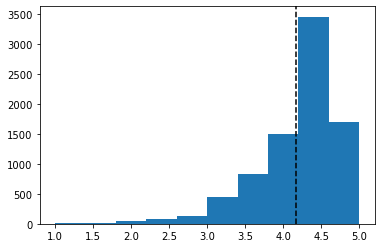

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [52]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
plt.hist(apps['Rating'])
plt.axvline(x=avg_app_rating, color ='k',linestyle = '--', label = 'mean')
plt.show()

# data = [go.Histogram(
#         x = 
#     apps['Rating'].hist()
# )]

# # Vertical dashed line to indicate the average app rating
# layout = {'shapes': [{
#               'type' :'line',
#               'x0': avg_app_rating,
#               'y0': 0,
#               'x1': avg_app_rating,
#               'y1': 1000,
#               'line': { 'dash': 'dashdot'}
#           }]
#           }
apps['Rating'].describe()

### 6. Size and price of an app

Let's now examine app size and app price. 
- For size, too large may be difficult and/or expensive for users. 
    We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB.
- For price, some users expect their apps to be free or inexpensive. 
    We also find that the vast majority of apps price themselves under $10.

How can we effectively come up with strategies to size and price our app?

    Does the size of an app affect its rating?
    Do users really care about system-heavy apps or do they prefer light-weighted apps?
    Does the price of an app affect its rating?
    Do users always prefer free apps over paid apps?
    
    
1. `apps[(~apps['Rating'].isna()) & (~apps['Size'].isna())]`
1. `DF.groupby('Category').filter(lambda x: len(x) >= 250)`
1. `sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])` 

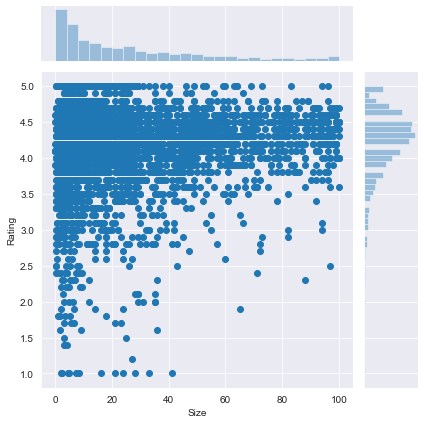

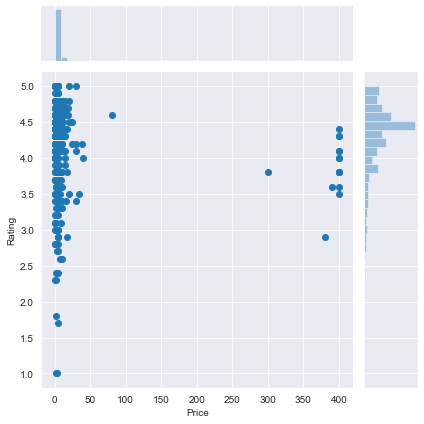

In [53]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isna()) & (~apps['Size'].isna())]
# print(apps_with_size_and_rating_present.head())

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

### 7. Relation between app category and app price

What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform. Different categories demand different price ranges. 

- Select a few popular app categories
    - `apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', ...'BUSINESS'])]`
- Examine the price trend by plotting Price vs Category
    - `ax = sns.stripplot(x = , y = , jitter=True, linewidth=1)`
    - `ax.set_title('App pricing trend across categories')`
- FIND All game apps are reasonably priced above $200.   
    - `apps_above_200 = apps[apps['Price']>200]`

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


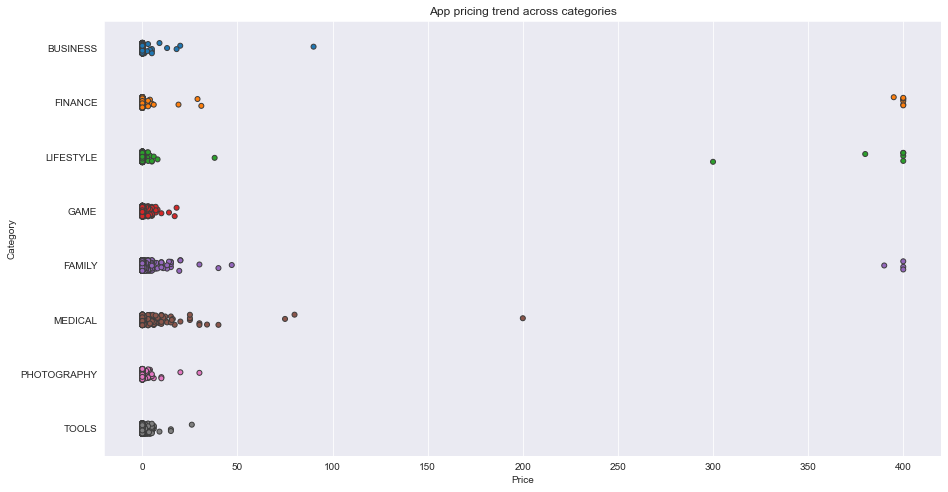

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

### 8. Filter out "junk" apps

- a bunch of the really expensive apps are "junk" apps. That is, apps that just for a joke or to test their app development skills. 

Let's filter out these junk apps and re-do our visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

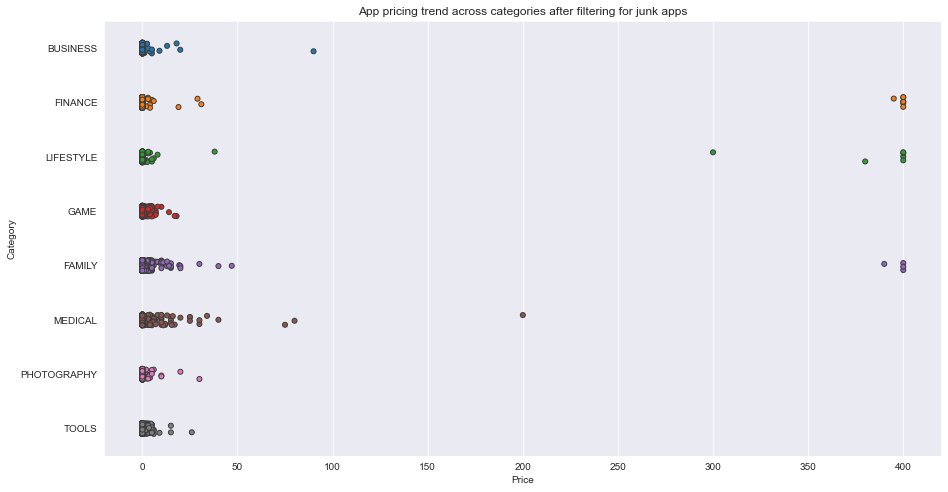

In [55]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = popular_app_cats, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

### 9. Popularity of paid apps vs free apps

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

    Free to download.
    Main source of income often comes from advertisements.
    Often created by companies that have other products and the app serves as an extension of those products.
    Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

    Users are asked to pay once for the app to download and use it.
    The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps? 
- It turns out that paid apps have a relatively lower number of installs than free apps
- the difference is not as stark as I would have expected!

In [73]:
print(apps['Type'].dtypes)
apps['Type'] = apps['Type'].astype('category')
print(apps['Type'].dtypes)
apps['Type'].value_counts()

category
category


Free    8903
Paid     756
Name: Type, dtype: int64

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

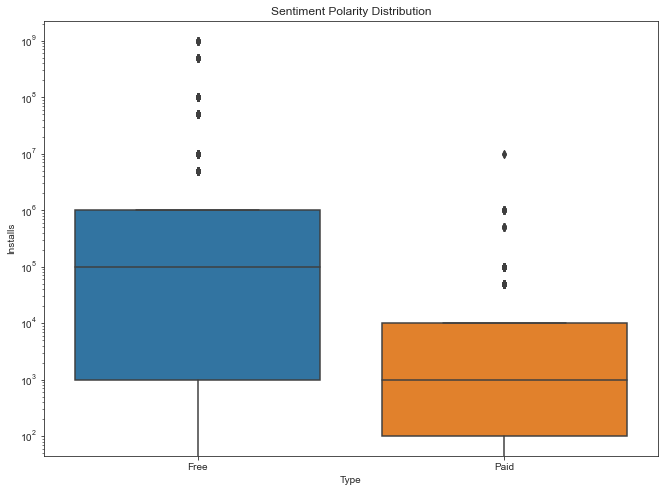

In [76]:
# plot the results
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# free = apps[apps['Type'] == 'Free']['Installs']
# paid = apps[apps['Type'] == 'Paid']['Installs']

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y ='Installs', data = apps)
# set y axis as log-scale
ax.set_yscale("log")
ax.set_title('Sentiment Polarity Distribution')

### 10. Sentiment analysis of user reviews

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called 

sentiment analysis:
- to identify if the mood is positive, negative or neutral about that app. 
- positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'.
- Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

Findings:
-  plotting sentiment polarity scores for paid and free apps
-  free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis.  
-  paid apps appear never to be extremely negative. This may indicate something about app quality, 
-  The median polarity score for paid apps is a little higher than free apps

In [57]:
# join directory, sub-directory, and file name 
file_path = os.path.join(current_dir, 'datasets', 'user_reviews.csv')
print(file_path)

# Read in the CSV as a DataFrame
with open(file_path, mode ='r',encoding="utf-8") as my_file: 
    reviews_df = pd.read_csv(my_file, index_col = None)
reviews_df.head()  

D:\datacamp\Project\P2 The Android App Market on Google Play\datasets\user_reviews.csv


,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [59]:
# Join the two dataframes
merged_df = apps.merge(reviews_df)
# exam outcome
merged_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [60]:
# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])
# exam outcome: row with NA removed
merged_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

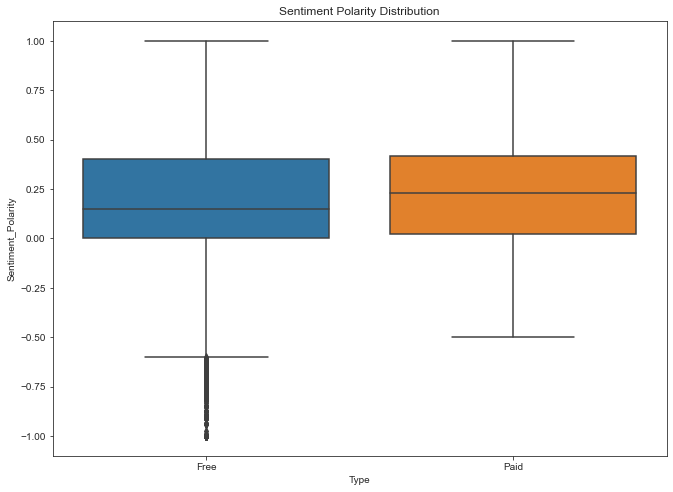

In [61]:
# plot the results
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')